In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum
import sys
sys.path.append('../')
import nbimporter
from _11_Others.External_Condition import get_temperature, get_absolute_humidity, get_relative_humidity

Importing Jupyter notebook from ..\_11_Others\External_Condition.ipynb


# III.I. Heating & Cooling Load and Envelope Performance - General - Appendix D Outside Air Intake Ventilation System through Underfloor / 第三章 暖冷房負荷と外皮性能 第一節 全般 付録D 床下空間を経由して外気を導入する換気方式

## 1. Introduction

This calculation depends on the specification of "Chapter 3 - 1 - Apx.D Heating & Cooling Load and Envelope Performance - General - Appendix D Outside Air Intake Ventilation System" in BRI.

## 2. Type

## 3. Functions

### 3.1 Heating & Cooling Load Reduction / 暖冷房負荷削減量

$$ \begin{array}
    \displaystyle \Delta L'_{H,uf,R,i} & = \rho_{air} \times Cp_{air} \times V_{R,i} \times ( \theta_{uf,R} - \theta_{ex} ) \times 10^{-3} \\
    & - U_s \times A_{s,ufvnt,R,i} \times ( \theta_{in} - \theta_{uf,R} ) \times 3.6 \times 10^{-3} \\
    & + U_{s,vert} \times A_{s,ufvnt,R,i} \times ( \theta_{in} - \theta_{ex} ) \times 0.7 \times 3.6 \times 10^{-3}
\end{array} $$

$$ \begin{array}
    \displaystyle \Delta L'_{CS,uf,R,i} & = \rho_{air} \times Cp_{air} \times V_{R,i} \times ( \theta_{ex} - \theta_{uf,R} ) \times 10^{-3} \\
    & + U_s \times A_{s,ufvnt,R,i} \times ( \theta_{in} - \theta_{uf,R} ) \times 3.6 \times 10^{-3} \\
    & - U_{s,vert} \times A_{s,ufvnt,R,i} \times ( \theta_{in} - \theta_{ex} ) \times 0.7 \times 3.6 \times 10^{-3}
\end{array} $$

$$
\theta_{uf,R} = \frac{ \rho_{air} \times Cp_{air} \times V_{R,A} \times \theta_{ex} + { A_{s,ufvnt,R,A} \times ( U_s \times \theta_{in} + U_{gf} \times \theta_g ) + \psi \times L_{uf,R} \times \theta_{ex} } \times 3.6 }{ \rho_{air} \times Cp_{air} \times V_{R,A} + { A_{s,ufvnt,R,A} \times ( U_s + U_{gf} ) + \psi \times L_{uf,R} } \times 3.6 }
$$

Where  
$ \Delta L'_{H,uf,R,i} $ is the hourly heating load reduction by outside air intake ventilation system through underfloor heating & cooling area  $i$  in the standard model house / 暖冷房区画$i$の標準住戸の床下空間を経由して外気を導入する換気方式による1時間当たりの暖房負荷削減量 (MJ/h);  
$ \Delta L'_{CS,uf,R,i} $ is the hourly sensible cooling load reduction by outside air intake ventilation system through underfloor heating & cooling area  $i$  in the standard model house / 暖冷房区画$i$の標準住戸の床下空間を経由して外気を導入する換気方式による1時間当たりの冷房顕熱負荷削減量 (MJ/h);  
$ \rho_{air} $ is the air density / 空気の密度 (kg/m<sup>3</sup>, 1.2);  
$ Cp_{air} $ is the specific heat of air / 空気の比熱 (kJ/kgK, 1.006);  
$ V_{R,i} $ is the hourly ventiration amount of heating & cooling area $i$ in the standard model house / 暖冷房区画$i$の標準住戸の1時間当たりの換気量 (m<sup>3</sup>/h);  
$ V_{R,A} $ is the hourly ventiration amount in the standard model house / 標準住戸の1時間当たりの換気量 (m<sup>3</sup>/h);  
$ U_s $ is the thermal transmittance of floor / 床の熱貫流率 (W/m<sup>2</sup>K);  
$ U_{s,vert} $ is the vertual thermal tranmittance of floor assumed when the heating & cooling load were calculated / 暖冷房負荷計算時に想定した床の熱貫流率(W/m<sup>2</sup>K);  
$ U_{gf} $ is the thermal transmittance of the ground / 地盤の熱貫流率 (W/m<sup>2</sup>K);  
$ \psi $ is the linier thermal transmittance of the basement / 基礎の線熱貫流率 (W/mK);  
$ A_{s,ufvnt,R,i} $ is the floor area of heating & cooling area $i$ adjacent to the under floor space with outside air intake in the standard model house / 暖冷房区画$i$の標準住戸の外気を導入する床下空間に接する床の面積 (m<sup>2</sup>);  
$ A_{s,ufvnt,R,A} $ is the floor area adjacent to the under floor space with outside air intake in the standard model house / 標準住戸の外気を導入する床下空間に接する床の面積 (m<sup>2</sup>);  
$ L_{uf,R} $ is the perimeter length of the basement of the under floor space with outside air intake in the standard model house / 標準住戸の外気を導入する床下空間の基礎外周長さ (m);  
$ \theta_{ex} $ is the outside air temperature / 外気温度 (degree C);  
$ \theta_{uf,R} $ is the temperature in the undefloor space in the standard model house / 標準住戸の床下温度 (<sup>o</sup>C);  
$ \theta_{in} $ is the inside air temperature / 室内温度 (degree C);  
$ \theta_g $ is the ground temperature / 地盤温度 (degree C).

In [2]:
def get_delta_L_H_uf_R_i(V_R_i, Theta_uf_R, Theta_ex, A_s_ufvnt_R_i, U_s_vert ):
    U_s      = 2.223 # W/m2K
    Theta_in = 20.0  # degree C
    rho_air  = 1.20  # kg/m3
    Cp_air   = 1.006 # kJ/kgK
    return   rho_air * Cp_air * V_R_i * ( Theta_uf_R - Theta_ex ) * ( 1/1000 ) \
           - U_s * A_s_ufvnt_R_i * ( Theta_in - Theta_uf_R ) * ( 3.6/1000 ) \
           + U_s_vert * A_s_ufvnt_R_i * ( Theta_in - Theta_ex ) * 0.7 * ( 3.6/1000 )

In [3]:
def get_delta_L_CS_uf_R_i(V_R_i, Theta_uf_R, Theta_ex, A_s_ufvnt_R_i, U_s_vert ):
    U_s      = 2.223 # W/m2K
    Theta_in = 27.0  # degree C
    rho_air  = 1.20  # kg/m3
    Cp_air   = 1.006 # kJ/kgK
    return - rho_air * Cp_air * V_R_i * ( Theta_uf_R - Theta_ex ) * ( 1/1000 ) \
           + U_s * A_s_ufvnt_R_i * ( Theta_in - Theta_uf_R ) * ( 3.6/1000 ) \
           - U_s_vert * A_s_ufvnt_R_i * ( Theta_in - Theta_ex ) * 0.7 * ( 3.6/1000 )

In [4]:
def get_theta_uf_R(V_R_A, theta_ex, A_s_ufvnt_R_A, theta_in, theta_g, psi, L_uf_R):
    rho_air  = 1.20  # kg/m3
    Cp_air   = 1.006 # kJ/kgK
    U_s      = 2.223 # W/m2K
    U_gf     = 2.223 # W/m2K
    return ( rho_air * Cp_air * V_R_A * theta_ex + ( A_s_ufvnt_R_A * ( U_s * theta_in + U_gf * theta_g) + psi * L_uf_R * theta_ex ) * 3.6 ) \
           / ( rho_air * Cp_air * V_R_A + ( A_s_ufvnt_R_A * ( U_s + U_gf) + psi * L_uf_R ) * 3.6 )

#### Example

In [5]:
get_delta_L_H_uf_R_i( V_R_i=52.933, Theta_uf_R=14.13, Theta_ex=2.6, A_s_ufvnt_R_i=14.905, U_s_vert=0.55090 )

0.3966346363440001

In [6]:
get_delta_L_CS_uf_R_i( V_R_i=52.933, Theta_uf_R=14.13, Theta_ex=2.6, A_s_ufvnt_R_i=14.905, U_s_vert=0.55090 )

0.29349255987599987

In [7]:
get_theta_uf_R(144.096,2.6,32.705,20.0,19.108478700327,0.858509693537642,23.3328204896022)

14.132923012411124

### 3.2 Ventilation Amount / 換気量

$$
\displaystyle V_{R,i} = V_{R,A} \times \frac{ A_{HCZ,R,i } }{ A_{MR,R} + A_{OR,R} }
$$

$$
\displaystyle V_{R,A} = ( A_{MR,R} + A_{OR,R} + A_{NO,R} ) \times 2.4 \times 0.5
$$

$$
A_{MR,R} = 29.81
$$

$$
A_{OR,R}=51.34
$$

$$
A_{NO,R}=38.93
$$

Where
$V_{R,i}$ is the hourly ventilation amount at heating and cooling area $i$ of the standard house / 標準住戸における暖冷房区画 $i$ の1時間当たりの換気量 (m<sup>3</sup>/h);  
$V_{R,A}$ is the hourly ventilation amount of the standard house / 標準住戸における1時間当たりの換気量 (m<sup>3</sup>/h);  
$ A_{HCZ,R,i} $ is the floor area of heating and cooling area $i$ of the standard house / 標準住戸における暖冷房区画 $i$ の床面積 (m<sup>2</sup>);  
$ A_{MR,R} $ is the floor area of the main habitable room of the standard house / 標準住戸の主たる居室の床面積 (m<sup>2</sup>);  
$ A_{OR,R} $ is the floor area of the other habitable room of the standard house / 標準住戸のその他の居室の床面積 (m<sup>2</sup>);  
$ A_{NO,R} $ is the floor area of the non habitable room of the standard house / 標準住戸の非居室の床面積 (m<sup>2</sup>).

$A_{HCZ,R,i}$ is defined in the table below.

| Heating and Cooling<br> Area Number | Room Name | Flooa Area<br>on Under Floor Space (m<sup>2</sup>) |
| :---: | :---: | :---: |
| 1 | LDK | 29.81 |
| 2 | Japanese Style Room / 和室 | 16.56 |
| 3 | Bedroom / 主寝室 | 13.25 |
| 4 | Children Room 1 / 子供室1 | 10.76 |
| 5 | Children Room 2 / 子供室2 | 10.77 |
| 6 | Bathroom / 浴室 | 3.31 |
| 7 | Toilet on 1st. floor / 1階便所 | 1.66 |
| 8 | Washroom / 洗面所 | 3.31 |
| 9 | Hall / ホール | 13.25 |
| 10 | Closet / クローゼット | 4.97 |
| 11 | Hall on 2nd. floor / 2階ホール | 10.77 |
| 12 | Toilet on 2nd. floor / 2階便所 | 1.66 |

In [8]:
A_MR_R = 29.81

In [9]:
A_OR_R = 51.34

In [10]:
A_NO_R = 38.93

In [11]:
def get_V_R_A():
    return ( A_MR_R + A_OR_R + A_NO_R ) * 2.4 * 0.5

In [12]:
def get_V_R():
    V_R_A = [29.81, 16.56, 13.25, 10.76, 10.77, 3.31, 13.25, 4.97, 10.77, 1.66]
    return [ get_V_R_A() * V_R_A_i / ( A_MR_R + A_OR_R ) for V_R_A_i in V_R_A ]

#### Example

In [13]:
get_V_R_A()

144.096

In [14]:
get_V_R()

[52.93286210720887,
 29.40517264325323,
 23.527689463955635,
 19.106259519408503,
 19.12401626617375,
 5.877483179297597,
 23.527689463955635,
 8.82510314232902,
 19.12401626617375,
 2.947619963031423]

### 3.3 Thermal Transmittance of Floor and Linier Thermal Transmittance of Basement / 床の熱貫流率及び基礎の線熱貫流率

Region 1 ~ 7:

$$
\displaystyle U_{s,vert} = \left\{
\begin{array}{ll}
    \frac{Q-Q_1}{Q_0-Q_1} \times U_{s,R,Q_0} + \frac{Q-Q_0}{Q_1-Q_0} \times U_{s,R,Q_1} & (Q > Q_1) \\
    \frac{Q-Q_2}{Q_1-Q_2} \times U_{s,R,Q_1} + \frac{Q-Q_1}{Q_2-Q_1} \times U_{s,R,Q_2} & (Q_1 \ge Q > Q_2) \\
    \frac{Q-Q_3}{Q_2-Q_3} \times U_{s,R,Q_2} + \frac{Q-Q_2}{Q_3-Q_2} \times U_{s,R,Q_3} & (Q_2 \ge Q > Q_3) \\
    \frac{Q-Q_4}{Q_3-Q_4} \times U_{s,R,Q_3} + \frac{Q-Q_3}{Q_4-Q_3} \times U_{s,R,Q_4} & (Q_3 \ge Q) \\
\end{array}
\right.
$$

Where, in case that $U_{s,vert}$ is over 2.223, let $U_{s,vert}$ equal to 2.223.

Region 8:

$$
\displaystyle U_{s,vert} = 2.223
$$

Where  
$ U_{s,vert} $ is the vertual thermal tranmittance of floor assumed when the heating & cooling load were calculated / 暖冷房負荷計算時に想定した床の熱貫流率(W/m<sup>2</sup>K);  
$Q$ is the heat loss coefficient of the concerned house.  

$Q_j$ is defined depending the region and j in the table below.

| | Region1 | Region2 | Region3 | Region4 | Region5 | Region6 | Region7 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| $j=0$ | 8.26 | 8.26 | 8.26 | 8.49 | 8.49 | 8.49 | 8.49 |
| $j=1$ | 2.8  | 2.8  | 4.0  | 4.7  | 5.19 | 5.19 | 8.27 |
| $j=2$ | 1.8  | 1.8  | 2.7  | 3.3  | 4.2  | 4.2  | 4.59 |
| $j=3$ | 1.6  | 1.6  | 1.9  | 2.4  | 2.7  | 2.7  | 2.7  |
| $j=4$ | 1.4  | 1.4  | 1.4  | 1.9  | 1.9  | 1.9  | 1.9  |

In [15]:
Q_j = {
    'Region1' : [8.26, 2.8,  1.8,  1.6, 1.4],
    'Region2' : [8.26, 2.8,  1.8,  1.6, 1.4],
    'Region3' : [8.26, 4.0,  2.7,  1.9, 1.4],
    'Region4' : [8.49, 4.7,  3.3,  2.4, 1.9],
    'Region5' : [8.49, 5.19, 4.2,  2.7, 1.9],
    'Region6' : [8.49, 5.19, 4.2,  2.7, 1.9],
    'Region7' : [8.49, 8.27, 4.59, 2.7, 1.9]
}

$U_{s,R,Q_j}$ is defined depending the region and $j$ in the table below.

| | Region1 | Region2 | Region3 | Region4 | Region5 | Region6 | Region7 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| $j=0$ | 2.223 | 2.223 | 2.223 | 2.223 | 2.223 | 2.223 | 2.223 |
| $j=1$ | 0.342 | 0.342 | 0.964 | 0.949 | 1.208 | 1.208 | 2.223 |
| $j=2$ | 0.427 | 0.427 | 0.791 | 0.825 | 1.360 | 1.360 | 1.633 |
| $j=3$ | 0.319 | 0.319 | 0.359 | 0.564 | 0.554 | 0.554 | 0.554 |
| $j=4$ | 0.272 | 0.272 | 0.272 | 0.373 | 0.373 | 0.373 | 0.373 |

In [16]:
U_s_R_Q_j = {
    'Region1' : [2.223, 0.342, 0.427, 0.319, 0.272],
    'Region2' : [2.223, 0.342, 0.427, 0.319, 0.272],
    'Region3' : [2.223, 0.964, 0.791, 0.359, 0.272],
    'Region4' : [2.223, 0.949, 0.825, 0.564, 0.373],
    'Region5' : [2.223, 1.208, 1.360, 0.554, 0.373],
    'Region6' : [2.223, 1.208, 1.360, 0.554, 0.373],
    'Region7' : [2.223, 2.223, 1.633, 0.554, 0.373]
}

In [17]:
def get_U_s_vert(Region, Q):
    if Region == 'Region8':
        return 2.223
    else:
        if Q > Q_j[Region][1]:
            return min(2.223, ( Q - Q_j[Region][1] ) / ( Q_j[Region][0] - Q_j[Region][1]) * U_s_R_Q_j[Region][0] + ( Q - Q_j[Region][0] ) / ( Q_j[Region][1] - Q_j[Region][0]) * U_s_R_Q_j[Region][1] )
        elif Q > Q_j[Region][2]:
            return min(2.223, ( Q - Q_j[Region][2] ) / ( Q_j[Region][1] - Q_j[Region][2]) * U_s_R_Q_j[Region][1] + ( Q - Q_j[Region][1] ) / ( Q_j[Region][2] - Q_j[Region][1]) * U_s_R_Q_j[Region][2] )
        elif Q > Q_j[Region][3]:
            return min(2.223, ( Q - Q_j[Region][3] ) / ( Q_j[Region][2] - Q_j[Region][3]) * U_s_R_Q_j[Region][2] + ( Q - Q_j[Region][2] ) / ( Q_j[Region][3] - Q_j[Region][2]) * U_s_R_Q_j[Region][3] )
        else:
            return min(2.223, ( Q - Q_j[Region][4] ) / ( Q_j[Region][3] - Q_j[Region][4]) * U_s_R_Q_j[Region][3] + ( Q - Q_j[Region][3] ) / ( Q_j[Region][4] - Q_j[Region][3]) * U_s_R_Q_j[Region][4] )

Region 1 ~ 7:

$$
\displaystyle \psi = \left\{
\begin{array}{ll}
    \frac{Q-Q_1}{Q_0-Q_1} \times \psi_{Q_0} + \frac{Q-Q_0}{Q_1-Q_0} \times \psi_{Q_1} & (Q > Q_1) \\
    \frac{Q-Q_2}{Q_1-Q_2} \times \psi_{Q_1} + \frac{Q-Q_1}{Q_2-Q_1} \times \psi_{Q_2} & (Q_1 \ge Q > Q_2) \\
    \frac{Q-Q_3}{Q_2-Q_3} \times \psi_{Q_2} + \frac{Q-Q_2}{Q_3-Q_2} \times \psi_{Q_3} & (Q_2 \ge Q > Q_3) \\
    \frac{Q-Q_4}{Q_3-Q_4} \times \psi_{Q_3} + \frac{Q-Q_3}{Q_4-Q_3} \times \psi_{Q_4} & (Q_3 \ge Q) \\
\end{array}
\right.
$$

Where, in case that $\psi$ is over 2.289, let $\psi$ equal to 2.289.

Region 8:

$$
\displaystyle U_{s,vert} = 2.289
$$

Where  
$ \psi $ is the linier thermal transmittance of the basement / 基礎の線熱貫流率 (W/mK).

$\psi_{Q_j}$ is defined depending the region and $j$ in the table below.

| | Region1 | Region2 | Region3 | Region4 | Region5 | Region6 | Region7 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| $j=0$ | 2.289 | 2.289 | 2.289 | 2.289 | 2.289 | 2.289 | 2.289 |
| $j=1$ | 0.635 | 0.635 | 1.517 | 1.504 | 1.872 | 1.872 | 2.289 |
| $j=2$ | 0.675 | 0.675 | 1.272 | 1.329 | 2.087 | 2.087 | 2.289 |
| $j=3$ | 0.516 | 0.516 | 0.573 | 0.877 | 0.863 | 0.863 | 0.863 |
| $j=4$ | 0.450 | 0.450 | 0.450 | 0.601 | 0.601 | 0.601 | 0.601 |

In [18]:
psi_Q_j = {
    'Region1' : [2.289, 0.635, 0.675, 0.516, 0.450],
    'Region2' : [2.289, 0.635, 0.675, 0.516, 0.450],
    'Region3' : [2.289, 1.517, 1.272, 0.573, 0.450],
    'Region4' : [2.289, 1.504, 1.329, 0.877, 0.601],
    'Region5' : [2.289, 1.872, 2.087, 0.863, 0.601],
    'Region6' : [2.289, 1.872, 2.087, 0.863, 0.601],
    'Region7' : [2.289, 2.289, 2.289, 0.863, 0.601]    
}

In [19]:
def get_psi(Region, Q):
    if Region == 'Region8':
        return 2.289
    else:
        if Q > Q_j[Region][1]:
            return min(2.289, ( Q - Q_j[Region][1] ) / ( Q_j[Region][0] - Q_j[Region][1]) * psi_Q_j[Region][0] + ( Q - Q_j[Region][0] ) / ( Q_j[Region][1] - Q_j[Region][0]) * psi_Q_j[Region][1] )
        elif Q > Q_j[Region][2]:
            return min(2.289, ( Q - Q_j[Region][2] ) / ( Q_j[Region][1] - Q_j[Region][2]) * psi_Q_j[Region][1] + ( Q - Q_j[Region][1] ) / ( Q_j[Region][2] - Q_j[Region][1]) * psi_Q_j[Region][2] )
        elif Q > Q_j[Region][3]:
            return min(2.289, ( Q - Q_j[Region][3] ) / ( Q_j[Region][2] - Q_j[Region][3]) * psi_Q_j[Region][2] + ( Q - Q_j[Region][2] ) / ( Q_j[Region][3] - Q_j[Region][2]) * psi_Q_j[Region][3] )
        else:
            return min(2.289, ( Q - Q_j[Region][4] ) / ( Q_j[Region][3] - Q_j[Region][4]) * psi_Q_j[Region][3] + ( Q - Q_j[Region][3] ) / ( Q_j[Region][4] - Q_j[Region][3]) * psi_Q_j[Region][4] )

#### Example

In [20]:
get_U_s_vert('Region6', 2.7)

0.554

In [21]:
get_psi('Region6',2.7)

0.863

### 3.4 Floor Area on Under Floor Space and Basement Perimeter Length of Under Floor Space / 床下空間に接する床の面積及び床下空間の基礎外周長さ

$$
\displaystyle L_{uf,R} = r \times 4 \times \sqrt{A_{s,ufvnt,R,A}}
$$

Where  
$ L_{uf,R} $ is the perimeter length of the basement of the under floor space with outside air intake in the standard model house / 標準住戸の外気を導入する床下空間の基礎外周長さ (m);  
$r$ is the ratio which represents the horizontal plan shape (like aspect ratio) / 床下の平面形状(アスペクト比等)を考慮した係数(無次元数) (=1.02);  
$A_{s,ufvnt,R,i}$ is the floor area on the under floor space with air intake at heating and cooling area $i$ in the standard house / 暖冷房空間$i$の標準住戸の外気を導入する床下空間に接する床の面積の合計 (m<sup>2</sup>).

In [22]:
def get_L_uf_R(A_s_ufvnt_R_A):
    r = 1.02
    return r * 4 * (A_s_ufvnt_R_A ** 0.5)

$$
\displaystyle A_{s,ufvnt,R,i} = A_{s,uf,R,i} \times r_{A,ufvnt}
$$

$A_{s,ufvnt,R,i}$ is the floor area on the under floor space with air intake at heating and cooling area $i$ in the standard house / 暖冷房空間$i$の標準住戸の外気を導入する床下空間に接する床の面積の合計 (m<sup>2</sup>)  
$A_{s,uf,R,i}$ is the floor area on the under floor space of heating and cooling area $i$ / 暖冷房区画$i$の標準住戸の床下空間に接する床の面積 (m<sup>2</sup>)  
$r_{A,ufvnt}$ is the ratio of the under floor space area with air intake to the under floor space area / 当該住戸において、床下空間全体の面積に対する外気を導入する床下空間の面積の比

$A_{s,uf,R,i}$ (m<sup>2</sup>) is defined in the table below.

| Heating and Cooling<br> Area Number | Room Name | Flooa Area<br>on Under Floor Space (m<sup>2</sup>) |
| :---: | :---: | :---: |
| 1 | LDK | 29.81 |
| 2 | Japanese Style Room / 和室 | 16.56 |
| 3 | Bedroom / 主寝室 | 0.0 |
| 4 | Children Room 1 / 子供室1 | 0.0 |
| 5 | Children Room 2 / 子供室2 | 0.0 |
| 6 | Bathroom / 浴室 | 3.31 |
| 7 | Toilet on 1st. floor / 1階便所 | 1.66 |
| 8 | Washroom / 洗面所 | 3.31 |
| 9 | Hall / ホール | 10.76 |
| 10 | Closet / クローゼット | 0.0 |
| 11 | Hall on 2nd. floor / 2階ホール | 0.0 |
| 12 | Toilet on 2nd. floor / 2階便所 | 0.0 |

In [23]:
def A_s_ufvnt_R(r_A_ufvnt): 
    return [ A * r_A_ufvnt for A in [29.81, 16.56, 0.0, 0.0, 0.0, 3.31, 1.66, 3.31, 10.76, 0.0, 0.0, 0.0] ] 

The sum of the floor area on the under floor space with air intake in the standard house $A_{s,ufvnt,R,i}$ is calculated below.

$$
\displaystyle A_{s,ufvnt,R,A} = \sum_{i=1}^{12}{A_{s,ufvnt,R,i}}
$$

In [24]:
def A_s_ufvnt_R_A (A_s_ufvnt_R):
    return np.array(A_s_ufvnt_R).sum()

#### Example

In [25]:
get_L_uf_R(A_s_ufvnt_R_A ( A_s_ufvnt_R(0.5) ))

23.332820489602195

In [26]:
A_s_ufvnt_R(0.5)

[14.905, 8.28, 0.0, 0.0, 0.0, 1.655, 0.83, 1.655, 5.38, 0.0, 0.0, 0.0]

In [27]:
A_s_ufvnt_R_A ( A_s_ufvnt_R(0.5) )

32.704999999999998

### 3.5 Ground Temperature / 地盤温度

$$
\displaystyle \theta_{g,d} = \theta_{uf,R,ave} + \frac{ (\theta_{ex,ave,max}-\theta_{ex,ave,min}) }{ 2 } \times \mathrm{e}^{-0.526(Z+Z_c)} \times \cos{ [ { n- ( 213 + n_c ) - 30.556 \times Z } \times 0.017214 ] }
$$

Where  
$\theta_{g,d}$ is the ground temperature at day $d$ (degree C);
$\theta_{ex,ave,max}$ is the maximum daily average outdoor temperature through a year / 日平均外気温度の年最大値 (degree C);  
$\theta_{ex,ave,min}$ is the minimum daily average outdoor temperature through a year / 日平均外気温度の年最小値 (degree C);  
$\theta_{uf,R,ave}$ is the annual average under floor temperature at  the standard house / 標準住戸の床下温度の年平均値 (degree C);  
$Z$ is the depth of ground / 地中深さ (m) (=0.3m);  
$Z_c$ is the correcte depth of ground / 補正地中深さ (m) (=2.0m);  
$n$ is the total days from January 1st. / 1月1日を起点とする述べ日数 (日);  
$n_c$ is the corrected total days / 補正日数 (日) (=45).

$\theta_{ex,ave,max}$ and $\theta_{ex,ave,min}$ are defined at the table below.

| | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| $\theta_{ex,ave,max}$ | 26.7 | 24.9 | 26.2 | 28.0 | 29.4 | 31.2 | 29.7 | 29.7 |
| $\theta_{ex,ave,min}$ | -15.2 | -12.6 | -5.5 | -5.3 | -2.1 | -1.0 | -0.6 | 13.6 |

In [28]:
def get_theta_g(theta_uf_R_ave, Region, n):
    theta_ex_ave_max = {
        'Region1': 26.7, 
        'Region2': 24.9, 
        'Region3': 26.2, 
        'Region4': 28.0, 
        'Region5': 29.4, 
        'Region6': 31.2,
        'Region7': 29.7,
        'Region8': 29.7
    }
    theta_ex_ave_min = {
        'Region1': -15.2,
        'Region2': -12.6,
        'Region3':  -5.5,
        'Region4':  -5.3,
        'Region5':  -2.1,
        'Region6':  -1.0,
        'Region7':  -0.6,
        'Region8':  13.6
    }
    Z = 0.3
    Z_c = 2.0
    n_c = 45
    return theta_uf_R_ave + (theta_ex_ave_max[Region] - theta_ex_ave_min[Region])/2 * math.exp(-0.526*(Z+Z_c)) * math.cos(( n - (213+n_c) -30.556*Z )*0.017214)


#### Example

The average temperature at under floor space of referenced house is 19.733872 degree C.  
Region 6  
Total days is 1

In [29]:
get_theta_g(19.733872, 'Region6', 1)

19.108550407189064

### 3.6 Average Temperature at Under Floor Space of Referenced House / 標準住戸の床下温度の年平均値

$$
\displaystyle \theta _{uf,R,ave} = a \times Q + b
$$

$\theta_{uf,R,ave}$ is the annual average temperature at under floor space of referenced house / 標準住戸の床下温度の年平均値 (degree C).

The coefficient a and b is defined based on the region and the heating operation mode in the table below.

<center>Coefficient $a$</center>

| Region | Intermittent | Continuous | Whole House |
| :---: | :---: | :---: | :---: |
| 1 | -0.527 | -0.469 | -0.302 |
| 2 | -0.484 | -0.431 | -0.281 |
| 3 | -0.409 | -0.359 | -0.233 |
| 4 | -0.331 | -0.298 | -0.196 |
| 5 | -0.321 | -0.292 | -0.206 |
| 6 | -0.273 | -0.248 | -0.184 |
| 7 | -0.236 | -0.238 | -0.210 |
| 8 | -0.033 | -0.032 | -0.048 |


<center>Coefficient $b$<center>

| Region | Intermittent | Continuous | Whole House |
| :---: | :---: | :---: | :---: |
| 1 | 14.4 | 15.5 | 16.6 |
| 2 | 15.4 | 16.4 | 17.3 |
| 3 | 16.7 | 17.5 | 18.2 |
| 4 | 17.3 | 18.1 | 18.8 |
| 5 | 18.4 | 19.0 | 19.5 |
| 6 | 20.0 | 20.4 | 20.7 |
| 7 | 21.2 | 21.3 | 21.4 |
| 8 | 24.1 | 24.0 | 23.8 |

In [30]:
def get_theta_uf_R_ave(Q,Region,OperationMode):

    Coefficient_a = {
        'Region1': { 'Intermittent' : -0.527, 'Continuous' : -0.469, 'WholeHouse' : -0.302 },
        'Region2': { 'Intermittent' : -0.484, 'Continuous' : -0.431, 'WholeHouse' : -0.281 },
        'Region3': { 'Intermittent' : -0.409, 'Continuous' : -0.359, 'WholeHouse' : -0.233 },
        'Region4': { 'Intermittent' : -0.331, 'Continuous' : -0.298, 'WholeHouse' : -0.196 },
        'Region5': { 'Intermittent' : -0.321, 'Continuous' : -0.292, 'WholeHouse' : -0.206 },
        'Region6': { 'Intermittent' : -0.273, 'Continuous' : -0.248, 'WholeHouse' : -0.184 },
        'Region7': { 'Intermittent' : -0.236, 'Continuous' : -0.238, 'WholeHouse' : -0.210 },
        'Region8': { 'Intermittent' : -0.033, 'Continuous' : -0.032, 'WholeHouse' : -0.048 }
    }

    Coefficient_b = {
        'Region1': { 'Intermittent' : 14.4, 'Continuous' : 15.5, 'WholeHouse' :16.6 },
        'Region2': { 'Intermittent' : 15.4, 'Continuous' : 16.4, 'WholeHouse' :17.3 },
        'Region3': { 'Intermittent' : 16.7, 'Continuous' : 17.5, 'WholeHouse' :18.2 },
        'Region4': { 'Intermittent' : 17.3, 'Continuous' : 18.1, 'WholeHouse' :18.8 },
        'Region5': { 'Intermittent' : 18.4, 'Continuous' : 19.0, 'WholeHouse' :19.5 },
        'Region6': { 'Intermittent' : 20.0, 'Continuous' : 20.4, 'WholeHouse' :20.7 },
        'Region7': { 'Intermittent' : 21.2, 'Continuous' : 21.3, 'WholeHouse' :21.4 },
        'Region8': { 'Intermittent' : 24.1, 'Continuous' : 24.0, 'WholeHouse' :23.8 }
    }
    return Coefficient_a[Region][OperationMode] * Q + Coefficient_b[Region][OperationMode]

#### Example

Q Value = 2.686 (W/m<sup>2</sup>K)  
Region all   
Heating Operating Mode is 'Continuous'

In [31]:
[ get_theta_uf_R_ave(2.686, r, 'Continuous') for r in ['Region1','Region2','Region3','Region4','Region5','Region6','Region7','Region8'] ]

[14.240266,
 15.242334,
 16.535726,
 17.299572,
 18.215688,
 19.733871999999998,
 20.660732,
 23.914048]

## 4. Integrated Function

### 4.1 Input Data

#### General / 基本情報

<table>
    <tr>
        <th>item</th>
        <th>ID</th>
        <th>option</th>
    </tr>
    <tr>
        <td>Sum of Floor Area / 床面積の合計</td>
        <td>bsc_nobeyuka_menseki</td>
        <td>1.00~5000.00(m<sup>2</sup>)</td>
    </tr>
    <tr>
        <td>Region (defined in Energy Efficiency Standard) / 省エネルギー基準地域区分</td>
        <td>env_chiiki</td>
        <td>1: Region 1 / 1地域<br>2: Region 2 / 2地域<br>3: Region 3 / 3地域<br>4: Region 4 / 4地域<br>5: Region 5 / 5地域<br>6: Region 6 / 6地域<br>7: Region 7 / 7地域<br>8: Region 8 / 8地域</td>
    </tr>
</table>

````
DataGeneral = {
    'bsc_nobeyuka_menseki': '' # Decimal Value represented string
}
````

#### Envelope

<table>
    <tr>
        <th> tab </th>
        <th> item </th>
        <th> ID </th>
        <th> option </th>
    </tr>
    <tr>
        <td rowspan=2>Envelope / 外皮</td>
        <td>Apply of Ventilation System with Outdoor Intake through Underfloor Space / 床下を経由して外気を導入する換気方式の採用</td>
        <td>ip_ufv</td>
        <td>1: Not Apply / 採用しない<br>2: Apply in a year / 通年利用する<br>3: Apply in a cooling season / 冷房期間のみ利用する<br>4: Apply in a heating season / 暖房期間のみ利用する</td>
    </tr>
        <td>Ratio of Area in Underfloor Space used for Supply Air Path / 外気が経由する床下の面積の割合</td>
        <td>ip_ufv_area_rate</td>
        <td>1~100 (%)</td>
    <tr>
    </tr>
</table>

````
DataEnvelope = {
    'ip_ufv'           = '',
    'ip_ufv_area_rate' = ''
}
````

In [32]:
def get_hourly_HC_load_reduction(DataGeneral, DataEnvelope):
    return 0

## 5. Explanation

### 5.1 Average Temperature at Under Floor Space

The value depends on the region, heating operation mode and Q Value.

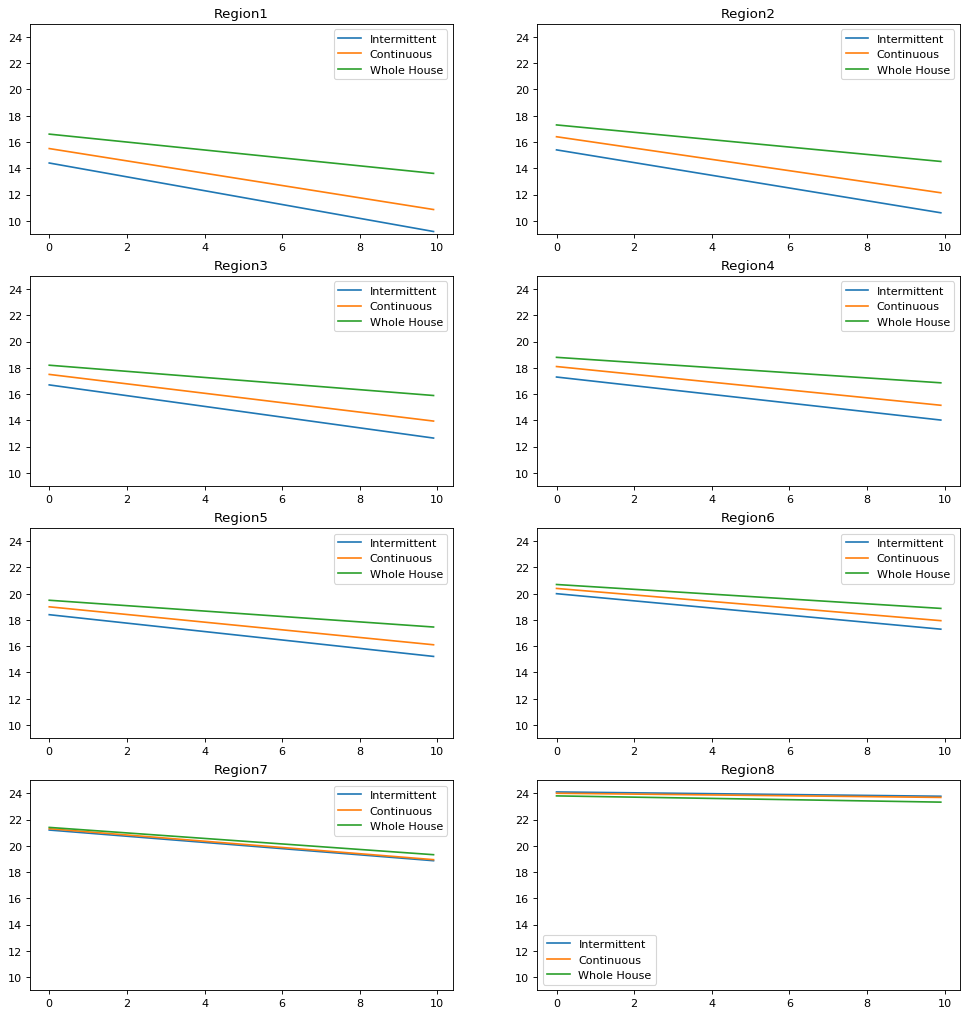

In [33]:
fignum = 8
xs = [ 0.1 * x for x in range(0,100) ]
plt.figure( figsize = (15,4*fignum/2), dpi=80 )
for i,r in enumerate(['Region1','Region2','Region3','Region4','Region5','Region6','Region7','Region8']):
    plt.subplot(fignum/2,2,i+1)
    ys1 = [ get_theta_uf_R_ave(x,r,'Intermittent') for x in xs ]
    ys2 = [ get_theta_uf_R_ave(x,r,'Continuous') for x in xs ]
    ys3 = [ get_theta_uf_R_ave(x,r,'WholeHouse') for x in xs ]
    plt.plot(xs, ys1, label='Intermittent')
    plt.plot(xs, ys2, label='Continuous')
    plt.plot(xs, ys3, label='Whole House')
    plt.ylim(9.0,25.0)
    plt.title(r)
    plt.legend()
plt.show()

### 5.2 Ground Temperature Curve for a Year

Groud temperature curve in the case of Q value of 2.686.

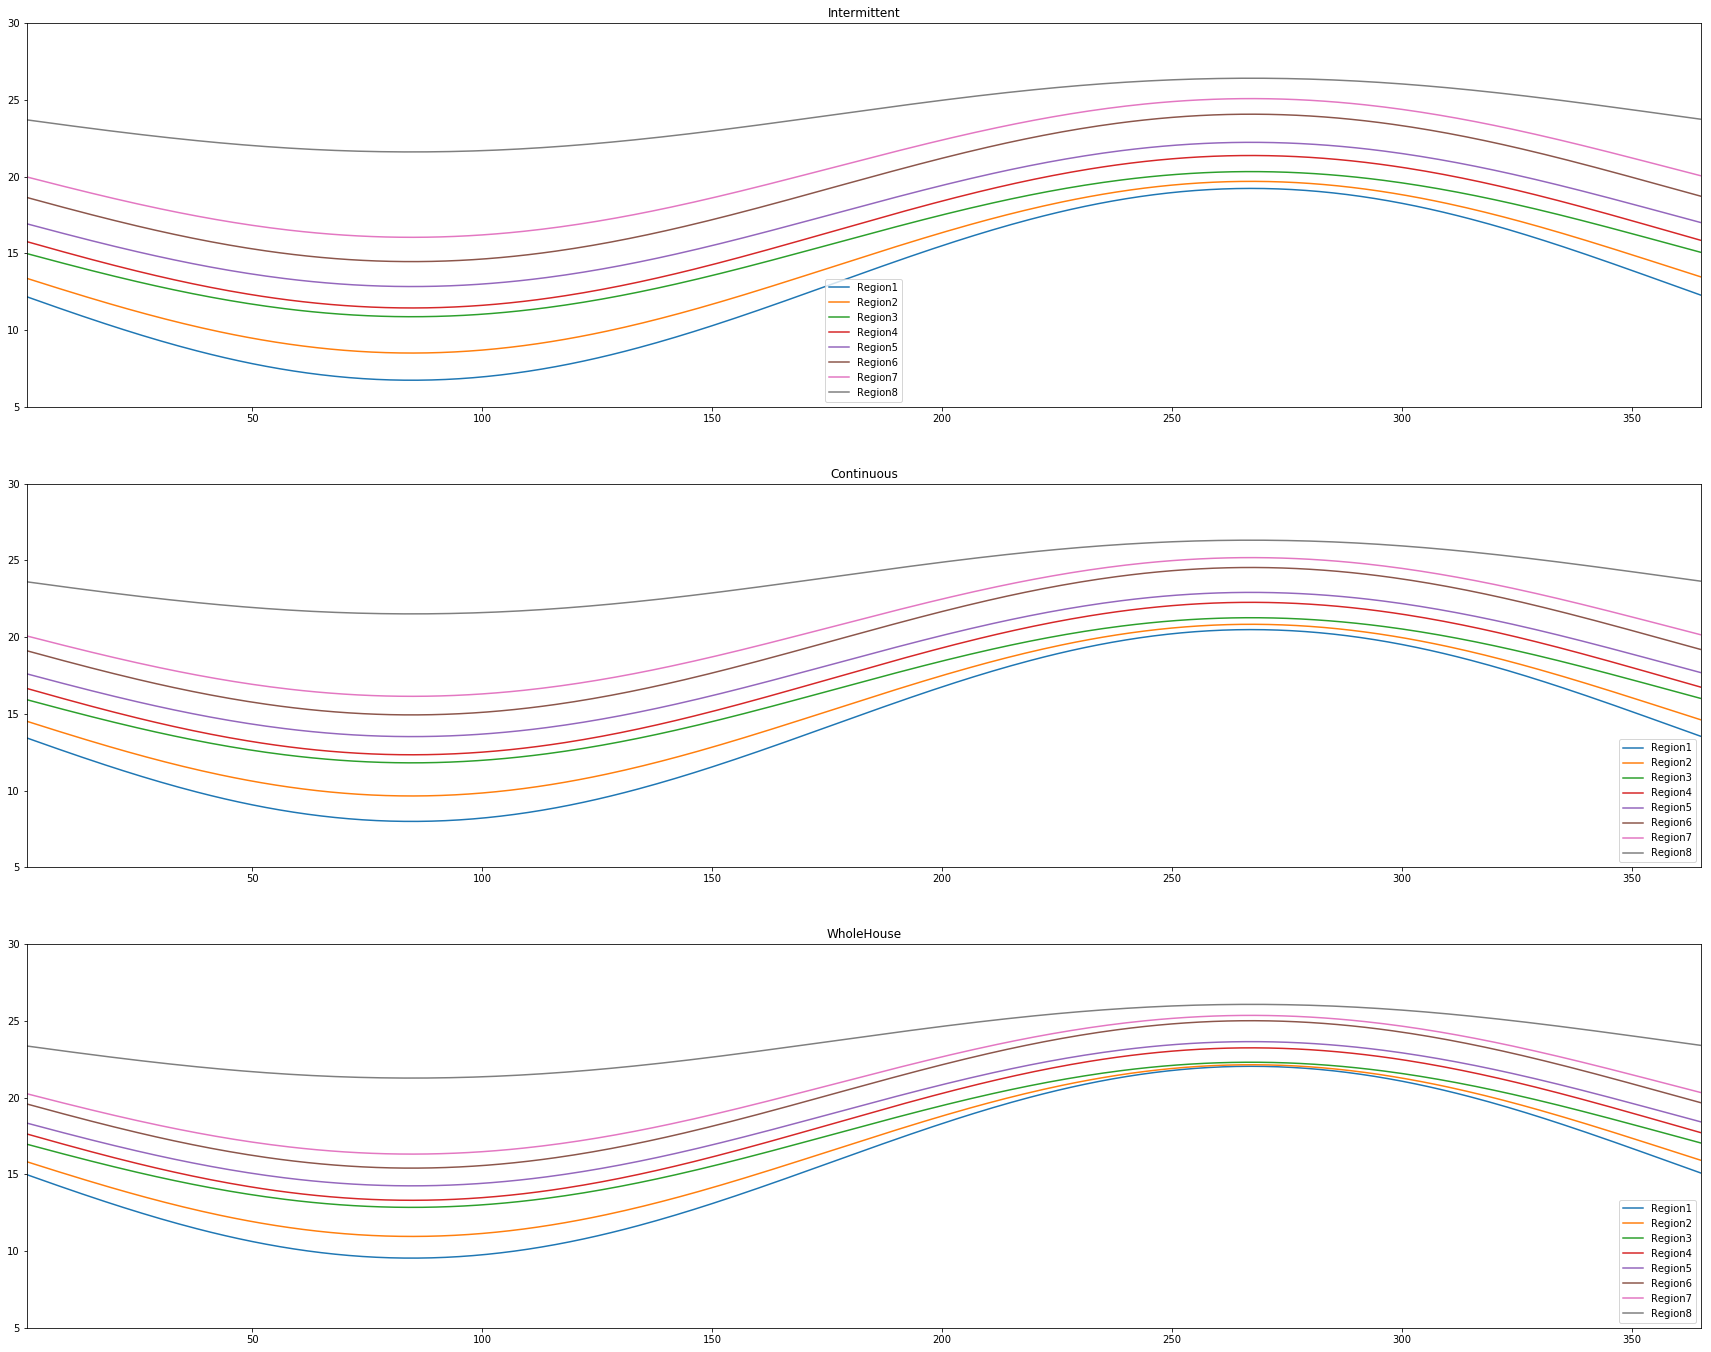

In [34]:
days = [ i + 1 for i in range(365) ]
def get_y(region,op,day):
    Q = 2.686
    t = get_theta_uf_R_ave(Q,region,op)
    return get_theta_g(t,region,day)
fignum = 3
plt.figure( figsize = ( 30, 8*fignum ) )
for i, op in enumerate(['Intermittent', 'Continuous', 'WholeHouse']):
    plt.subplot(fignum,1,i+1)
    for r in ['Region1','Region2','Region3','Region4','Region5','Region6','Region7','Region8']:
        y = [ get_y(r,op,d) for d in days ]
        plt.plot(days,y,label=r)
    plt.xlim(1,365)
    plt.ylim(5.0,30.0)
    plt.title(op)
    plt.legend()
plt.show()


### 5.3 $Q$ Value vs. $U_{s,vert}$ Value

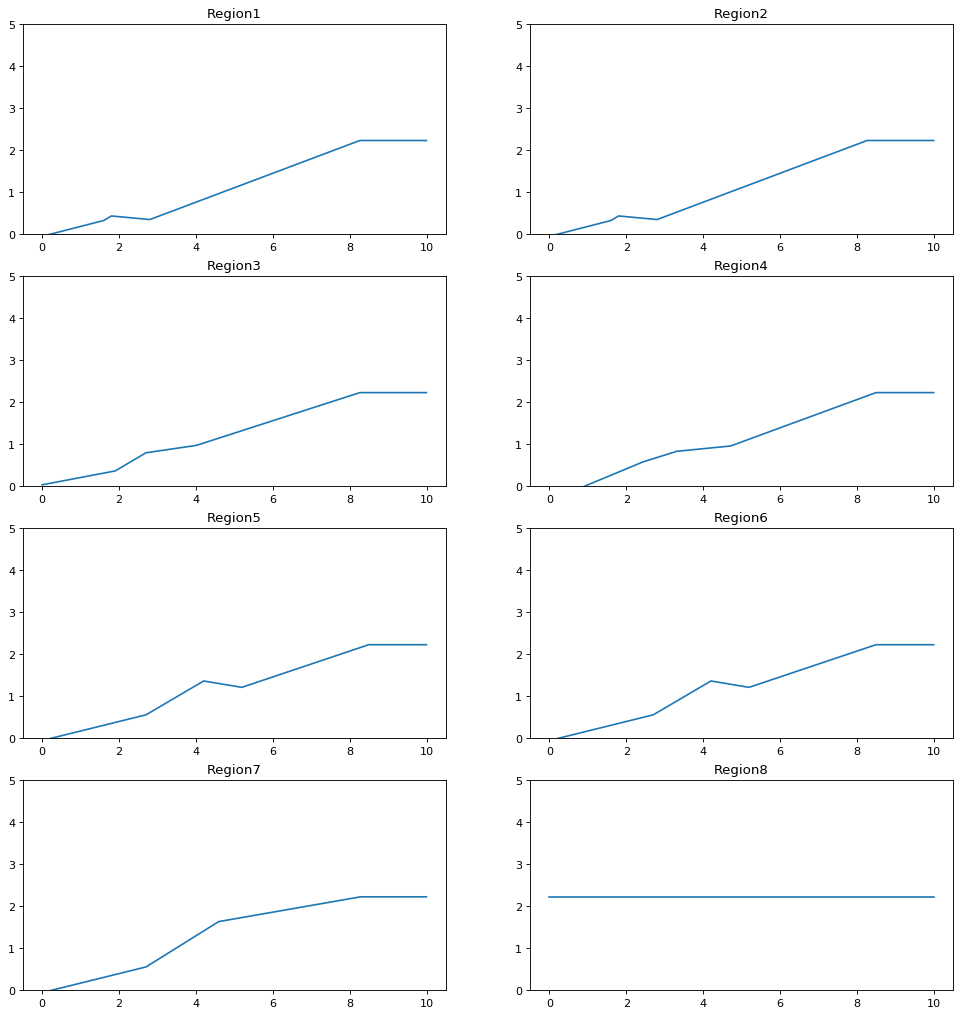

In [35]:
fignum = 8
xs = [ 0.01 * x for x in range(0,1000) ]
plt.figure( figsize = ( 15, 4*fignum/2 ), dpi=80 )
for i,r in enumerate(['Region1','Region2','Region3','Region4','Region5','Region6','Region7','Region8']):
    plt.subplot(fignum/2,2,i+1)
    ys = [ get_U_s_vert(r,x) for x in xs ]
    plt.plot(xs, ys)
    plt.ylim(0.0,5.0)
    plt.title(r)
plt.show()

### 5.4 $Q$ Value vs. $\psi$ Value

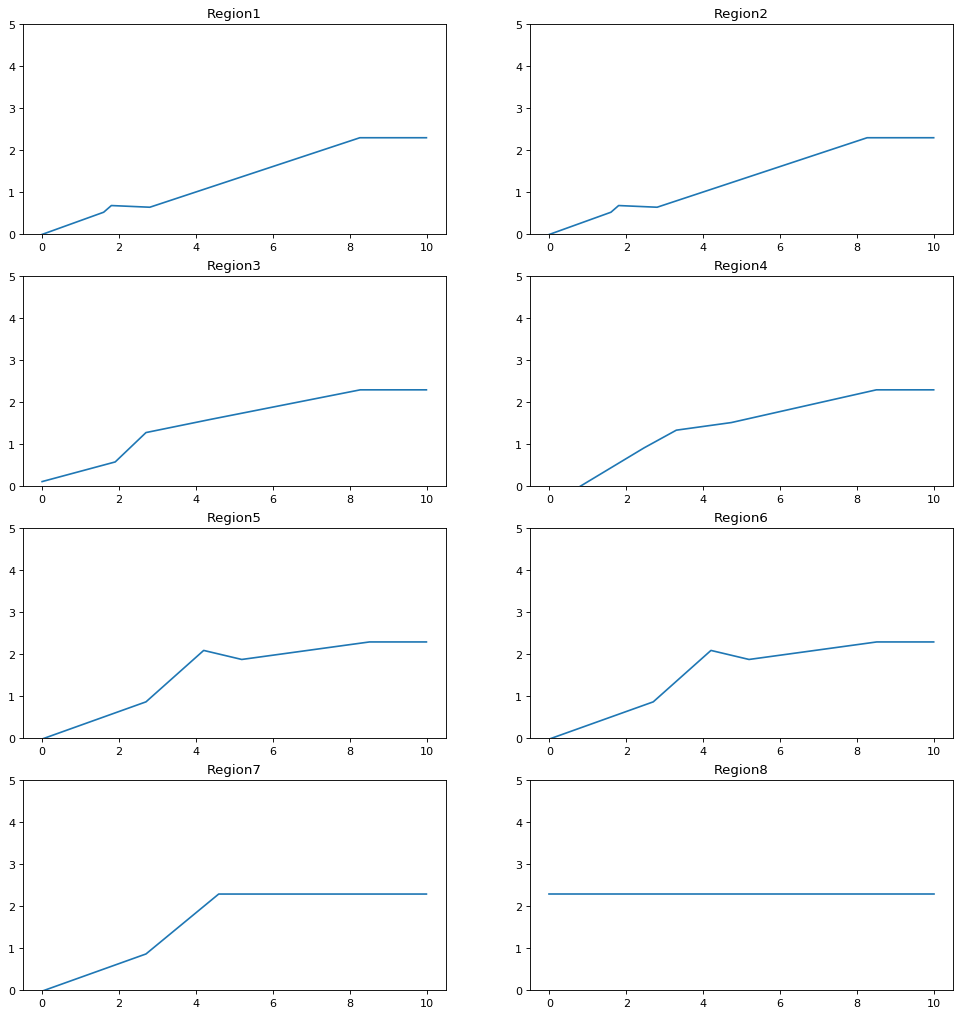

In [36]:
fignum = 8
xs = [ 0.01 * x for x in range(0,1000) ]
plt.figure( figsize = ( 15, 4*fignum/2 ), dpi=80 )
for i,r in enumerate(['Region1','Region2','Region3','Region4','Region5','Region6','Region7','Region8']):
    plt.subplot(fignum/2,2,i+1)
    ys = [ get_psi(r,x) for x in xs ]
    plt.plot(xs, ys)
    plt.ylim(0.0,5.0)
    plt.title(r)
plt.show()